In [6]:
from math import cos
from math import sin

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Calar el código del Cons
Aquí primero vamos a corroborar que el programa que nos facilitó el camarada Cons funcione correctamente

In [2]:
n=2500
tf=200
h=tf/n
x0=1
y0=0
delta=0.3
alfa=-1
beta=1
gamma=1.1
omega=1.2

In [3]:
def funcion(x, y, t):
    return (-delta*y - 2*alfa*x -beta*x**3 + gamma*cos(omega*t))

In [4]:
def rungeKutta(h, x0, y0,t):
    global x1,y1
    l1 = h * funcion(x0, y0,t)
    k1 = h * y0  
    l2 = h * funcion(x0 + (k1/2), y0 + (l1/2),t + (h/2))
    k2 = h * (y0+l1/2)  
    l3 = h * funcion(x0 + (k2/2), y0 + (l2/2),t + (h/2))
    k3 = h * (y0+l2/2)
    l4 = h * funcion(x0 + k3, y0 + l3,t + h)
    k4 = h * (y0+l3)
    x1= x0 + (k1+2*k2+2*k3+k4)/6
    y1= y0 + (l1+2*l2+2*l3+l4)/6
    return [x1,y1]

In [5]:
x=[]
y=[]
t=[]
x.append(x0)
y.append(y0)
t.append(0)
for i in range(1,n-1):
    rungeKutta(h,x[i-1],y[i-1],t[i-1])
    t.append(i*h)
    x.append(x1)
    y.append(y1)

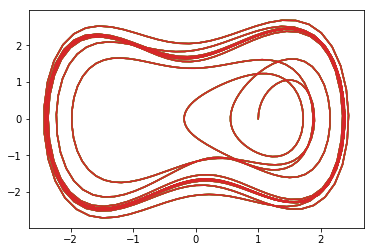

In [12]:
plt.plot( x, y )
plt.show()

## Adaptar el código para nuestro problema 

In [2]:
# Constantes (en unidades del SI)
G = 6.67E-11 # Constante de Grav. Universal
M_e = 5.972E24 # Masa de la Tierra
R_e = 6.371E6 # Radio de la Tierra
M_l = 7.349E22 # Masa de la Luna
R_l = 384.4E6 # Distancia Tierra-Luna

# Condiciones de la simulación
n = 2500
tf = 500
h = tf/n

#Condiciones iniciales
x0 = R_e/3**(1/2)
y0 = R_e/3**(1/2)
z0 = R_e/3**(1/2)
vx0 = 0
vy0 = 0
vz0 = 0

In [3]:
# Función para calcular la magnitud de un vector
def mag( x, y, z ):
    r = (x**2 + y**2 + z**2)**(1.0/2.0)
    return r

# Función para calcular la aceleración en x
def ax( x, y, z ):
    r = mag(x, y, z)
    ax = (-(G*M_e/r**3)*x - G*M_l*(R_l**2 + r**2 - 2*x*R_l)**(-3.0/2.0)*x 
          + G*M_l*R_l*(R_l**2 + r**2 - 2*x*R_l)**(-3.0/2.0) - G*M_e/R_l**3)
    return ax

# Función para calcular la aceleración en y
def ay( x, y, z ):
    r = mag(x, y, z)
    ay = -(G*M_e/r**3)*y - G*M_l*(R_l**2 + r**2 - 2*x*R_l)**(-3.0/2.0)*y 
    return ay

# Función para calcular la aceleración en z
def az( x, y, z ):
    r = mag(x, y, z)
    az = -(G*M_e/r**3)*z - G*M_l*(R_l**2 + r**2 - 2*x*R_l)**(-3.0/2.0)*z 
    return az

In [9]:
def rungeKutta_x(h, x0, y0, z0, vx0):
    global x1,vx1
    
    l1 = h * np.asarray(ax(x0, y0, z0))
    k1 = h * vx0  
    
    l2 = h * np.asarray(ax(x0 + (k1/2), y0, z0 ))
    k2 = h * (vx0 + l1/2)  
    
    l3 = h * np.asarray(ax(x0 + (k2/2), y0, z0))
    k3 = h * (vx0 + l2/2)
    
    l4 = h * np.asarray(ax(x0 + k3, y0 + k3, z0 + k3))
    k4 = h * (vx0 + l3)
    
    x1 = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    vx1 = vx0 + (l1 + 2*l2 + 2*l3 + l4)/6
    
    return [x1,vx1]

def rungeKutta_y(h, x0, y0, z0, vy0):
    global y1,vy1
    
    l1 = h * np.asarray(ay(x0, y0, z0))
    k1 = h * vy0  
    
    l2 = h * np.asarray(ay(x0, y0 + (k1/2), z0))
    k2 = h * (vy0 + l1/2)  
    
    l3 = h * np.asarray(ay(x0, y0 + (k2/2), z0))
    k3 = h * (vy0 + l2/2)
    
    l4 = h * np.asarray(ay(x0, y0 + k3, z0))
    k4 = h * (vy0 + l3)
    
    y1 = y0 + (k1 + 2*k2 + 2*k3 + k4)/6
    vy1 = vy0 + (l1 + 2*l2 + 2*l3 + l4)/6
    
    return [y1,vy1]

def rungeKutta_z(h, x0, y0, z0, vz0):
    global z1,vz1
    
    l1 = h * np.asarray(az(x0, y0, z0))
    k1 = h * vz0  
    
    l2 = h * np.asarray(az(x0, y0, z0 + (k1/2)))
    k2 = h * (vz0 + l1/2)  
    
    l3 = h * np.asarray(az(x0, y0, z0 + (k2/2)))
    k3 = h * (vz0 + l2/2)
    
    l4 = h * np.asarray(az(x0, y0, z0 + k3))
    k4 = h * (vz0 + l3)
    
    z1 = z0 + (k1 + 2*k2 + 2*k3 + k4)/6
    vz1= vz0 + (l1 + 2*l2 + 2*l3 + l4)/6
    
    return [z1,vz1]

In [10]:
# Listas para almacenar los valores
x=[]
y=[]
z=[]
t=[]
vx=[]
vy=[]
vz=[]
h=[] # Altura de la marea

# Valores iniciales
x.append(x0)
y.append(y0)
z.append(z0)
vx.append(vx0)
vy.append(vy0)
vz.append(vz0)
t.append(0)

for i in range(1,n-1):
    rungeKutta_x(h,x[i-1],y[i-1],z[i-1],vx[i-1])
    rungeKutta_y(h,x[i-1],y[i-1],z[i-1],vy[i-1])
    rungeKutta_z(h,x[i-1],y[i-1],z[i-1],vz[i-1])
    
    h1 = mag(x[i-1], y[i-1], z[i-1]) - R_e
    
    t.append(i*h)
    x.append(x1)
    vx.append(vx1)
    y.append(y1)
    vy.append(vy1)
    z.append(z1)
    vz.append(vz1)
    h.append(h1)

TypeError: unsupported operand type(s) for /: 'list' and 'int'